In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from matplotlib.legend_handler import HandlerLine2D

# 设置全局字体为 Times New Roman
plt.rcParams["font.family"] = "Times New Roman"
# plt.rcParams.update({"font.size": 12})

# 启用 LaTeX 渲染
plt.rcParams["text.usetex"] = True


# 定义图例处理器
class ColorLineStyleHandler(HandlerLine2D):
    def create_artists(
        self, legend, orig_handle, xdescent, ydescent, width, height, fontsize, trans
    ):
        # 获取线条的颜色、样式和标签
        color = orig_handle.get_color()
        linestyle = orig_handle.get_linestyle()
        label = orig_handle.get_label()

        # 创建一个新的 Line2D 对象，设置线条的颜色、样式和标签，并添加文本标注
        line = plt.Line2D(
            [0, width],
            [height // 2, height // 2],
            linestyle=linestyle,
            color=color,
            linewidth=2,
        )
        return [line]

### Trotter-Suzuki

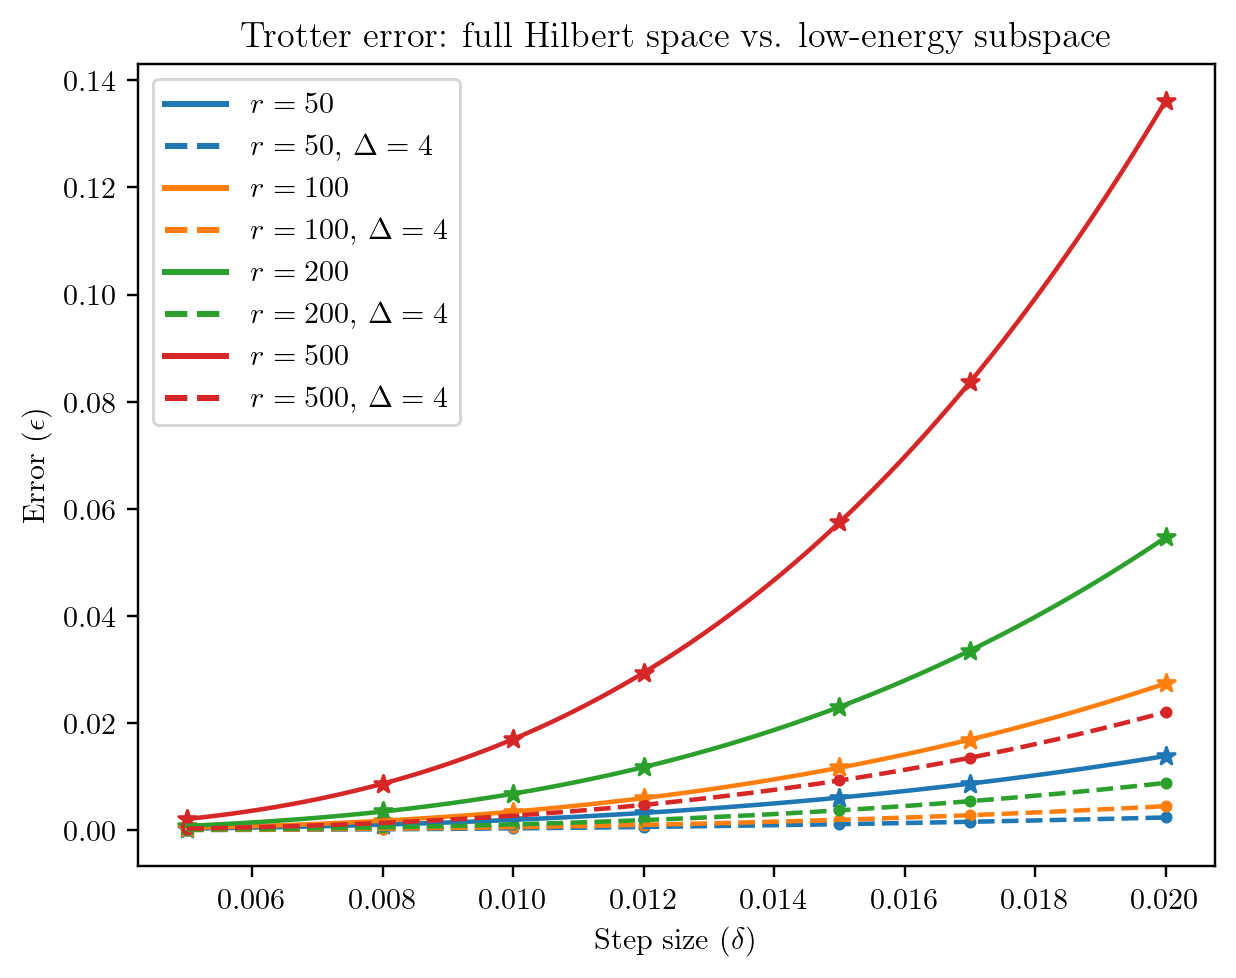

In [7]:
# Trotter error on 2x6 Heisenberg model
Delta = 4
File = '../Trotter/norm_2x6_4.mat'

r_50 = loadmat(File)['r_50'].flatten()
r_50_Delta = loadmat(File)['r_50_Delta'].flatten()
r_100 = loadmat(File)['r_100'].flatten()
r_100_Delta = loadmat(File)['r_100_Delta'].flatten()
r_200 = loadmat(File)['r_200'].flatten()
r_200_Delta = loadmat(File)['r_200_Delta'].flatten()
r_500 = loadmat(File)['r_500'].flatten()
r_500_Delta = loadmat(File)['r_500_Delta'].flatten()

dt = np.array([0.005, 0.008, 0.010, 0.012, 0.015, 0.017, 0.020])
dt_new = np.linspace(min(dt), max(dt), 100)

coefficients_r_50 = np.polyfit(dt, r_50, 3) 
poly_r_50 = np.poly1d(coefficients_r_50)
coefficients_r_50_Delta = np.polyfit(dt, r_50_Delta, 3) 
poly_r_50_Delta = np.poly1d(coefficients_r_50_Delta)

coefficients_r_100 = np.polyfit(dt, r_100, 3)  
poly_r_100 = np.poly1d(coefficients_r_100)
coefficients_r_100_Delta = np.polyfit(dt, r_100_Delta, 3)  
poly_r_100_Delta = np.poly1d(coefficients_r_100_Delta)

coefficients_r_200 = np.polyfit(dt, r_200, 3) 
poly_r_200 = np.poly1d(coefficients_r_200)
coefficients_r_200_Delta = np.polyfit(dt, r_200_Delta, 3) 
poly_r_200_Delta = np.poly1d(coefficients_r_200_Delta)

coefficients_r_500 = np.polyfit(dt, r_500, 3) 
poly_r_500 = np.poly1d(coefficients_r_500)
coefficients_r_500_Delta = np.polyfit(dt, r_500_Delta, 3)  
poly_r_500_Delta = np.poly1d(coefficients_r_500_Delta)

fig, ax = plt.subplots(dpi=217)
ax.set_title('Trotter error: full Hilbert space vs. low-energy subspace')
ax.set_xlabel('Step size ($\delta$)')
ax.set_ylabel('Error ($\epsilon$)')

ax.scatter(dt, r_50, marker = '*', color = '#1f77b4')
ax.plot(dt_new, poly_r_50(dt_new), color = '#1f77b4', linestyle = '-', label='$r=50$')

ax.scatter(dt, r_50_Delta, marker ='.', color = '#1f77b4')
ax.plot(dt_new, poly_r_50_Delta(dt_new), color = '#1f77b4', linestyle = '--', label='$r=50$, $\Delta = {Delta}$'.format(Delta = Delta))

ax.scatter(dt, r_100, marker = '*', color = '#ff7f0e')
ax.plot(dt_new, poly_r_100(dt_new), color = '#ff7f0e', linestyle = '-', label='$r=100$')

ax.scatter(dt, r_100_Delta, marker ='.', color = '#ff7f0e')
ax.plot(dt_new, poly_r_100_Delta(dt_new), color = '#ff7f0e', linestyle = '--', label='$r=100$, $\Delta = {Delta}$'.format(Delta = Delta))

ax.scatter(dt, r_200, marker = '*', color = '#2ca02c')
ax.plot(dt_new, poly_r_200(dt_new), color = '#2ca02c', linestyle = '-', label='$r=200$')

ax.scatter(dt, r_200_Delta, marker ='.', color = '#2ca02c')
ax.plot(dt_new, poly_r_200_Delta(dt_new), color = '#2ca02c', linestyle = '--', label='$r=200$, $\Delta = {Delta}$'.format(Delta = Delta))

ax.scatter(dt, r_500, marker = '*', color = '#d62728')
ax.plot(dt_new, poly_r_500(dt_new), color = '#d62728', linestyle = '-', label='$r=500$')

ax.scatter(dt, r_500_Delta, marker ='.', color = '#d62728')
ax.plot(dt_new, poly_r_500_Delta(dt_new), color = '#d62728', linestyle = '--', label='$r=500$, $\Delta = {Delta}$'.format(Delta = Delta))
ax.legend(handler_map={plt.Line2D: ColorLineStyleHandler()})

fig.savefig('Trotter-2x6.pdf', dpi=600, format='pdf')

### qDRIFT

In [2]:
def plot_data_and_fit(
    step_number,
    data,
    std_dev,
    color,
    label,
    linestyle="-",
    marker="*",
    starting_point=0,
    offset=0
):
    step_number = np.log(step_number) / np.log(10)
    coefficients = np.polyfit(step_number, data, 1)
    poly = np.poly1d(coefficients)
    ax.errorbar(
        step_number+offset,
        data,
        yerr=std_dev,
        fmt=marker,
        color=color,
        ecolor=color,
        capsize=5,
    )
    step_number_new = np.linspace(min(step_number), max(step_number), 100)
    ax.plot(
        step_number_new[starting_point:],
        poly(step_number_new)[starting_point:],
        color=color,
        linestyle=linestyle,
        label=label,
    )
    print("slope =", poly[1], "for {}".format(label))

slope = -0.4531380813651958 for $t=1.0$
slope = -0.4567133273003375 for $t=1.0$, $\Delta = 14$
slope = -0.4681866277299754 for $t=3.0$
slope = -0.4596117167074507 for $t=3.0$, $\Delta = 14$
slope = -0.46317773455916394 for $t=5.0$
slope = -0.46510394020200013 for $t=5.0$, $\Delta = 14$
slope = -0.44636833124629005 for $t=10.0$
slope = -0.44318329218815744 for $t=10.0$, $\Delta = 14$


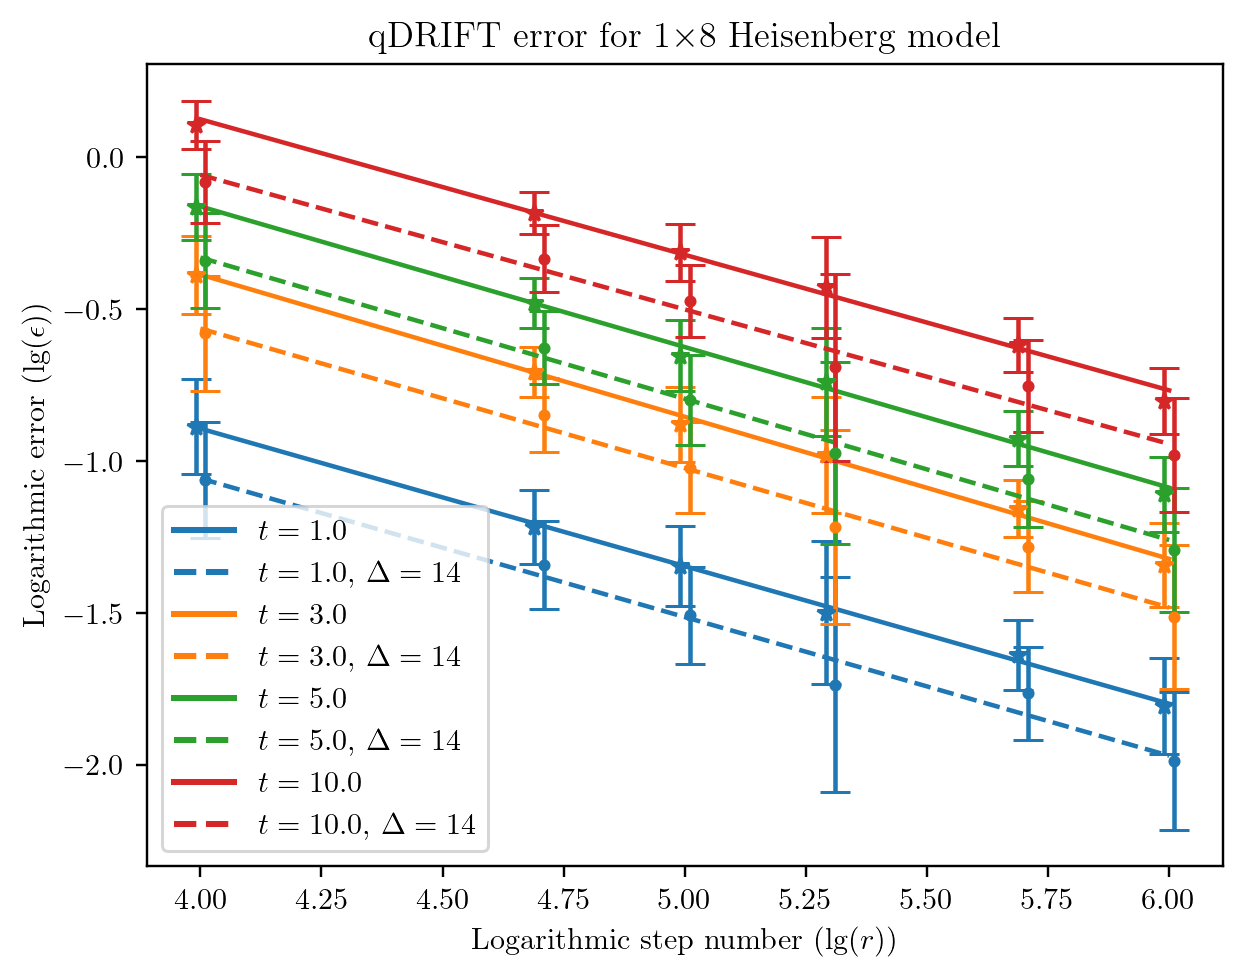

In [3]:
# qDRIFT error on 1x8 Heisenberg model
# Load data and convert to logarithmic form
Delta = 14
File = "../qDRIFT/norm_1x8_14.mat"


def process_data(data_key):
    data_matrix = np.log(loadmat(File)[data_key]) / np.log(10)
    mean_values = np.mean(data_matrix, axis=0)
    std_dev = np.std(data_matrix, axis=0)
    return mean_values, std_dev


t_1, t_1_std = process_data("t_1")
t_1_Delta, t_1_Delta_std = process_data("t_1_Delta")
t_3, t_3_std = process_data("t_3")
t_3_Delta, t_3_Delta_std = process_data("t_3_Delta")
t_5, t_5_std = process_data("t_5")
t_5_Delta, t_5_Delta_std = process_data("t_5_Delta")
t_10, t_10_std = process_data("t_10")
t_10_Delta, t_10_Delta_std = process_data("t_10_Delta")

r = np.array([10000, 50000, 100000, 200000, 500000, 1000000])

# Plot curve and error bar
fig, ax = plt.subplots(dpi=217)
ax.set_title("qDRIFT error for 1$\\times$8 Heisenberg model")
ax.set_xlabel("Logarithmic step number ($\lg(r)$)")
ax.set_ylabel("Logarithmic error ($\lg(\epsilon)$)")

offset = 0.01
plot_data_and_fit(r, t_1, t_1_std, "#1f77b4", "$t=1.0$", offset=-offset)
plot_data_and_fit(
    r,
    t_1_Delta,
    t_1_Delta_std,
    "#1f77b4",
    "$t=1.0$, $\Delta = {Delta}$".format(Delta=Delta),
    linestyle="--",
    marker=".",
    offset=offset,
)
plot_data_and_fit(r, t_3, t_3_std, "#ff7f0e", "$t=3.0$", offset=-offset)
plot_data_and_fit(
    r,
    t_3_Delta,
    t_3_Delta_std,
    "#ff7f0e",
    "$t=3.0$, $\Delta = {Delta}$".format(Delta=Delta),
    linestyle="--",
    marker=".",
    offset=offset,
)
plot_data_and_fit(r, t_5, t_5_std, "#2ca02c", "$t=5.0$", offset=-offset)
plot_data_and_fit(
    r,
    t_5_Delta,
    t_5_Delta_std,
    "#2ca02c",
    "$t=5.0$, $\Delta = {Delta}$".format(Delta=Delta),
    linestyle="--",
    marker=".",
    offset=offset,
)
plot_data_and_fit(r, t_10, t_10_std, "#d62728", "$t=10.0$", offset=-offset)
plot_data_and_fit(
    r,
    t_10_Delta,
    t_10_Delta_std,
    "#d62728",
    "$t=10.0$, $\Delta = {Delta}$".format(Delta=Delta),
    linestyle="--",
    marker=".",
    offset=offset,
)

ax.legend(handler_map={plt.Line2D: ColorLineStyleHandler()})
fig.savefig('qDRIFT-1x8.pdf', dpi=600, format='pdf')

slope = 1.0748771017945624 for $t=1.0$
slope = 0.5728172203201631 for $t=1.0$, $\Delta = 14$
slope = 1.0312343768026029 for $t=3.0$
slope = 0.5932249326490099 for $t=3.0$, $\Delta = 14$
slope = 1.0723807392652087 for $t=5.0$
slope = 0.6236091391000478 for $t=5.0$, $\Delta = 14$
slope = 1.1802763354507835 for $t=10.0$
slope = 0.7300071811201096 for $t=10.0$, $\Delta = 14$


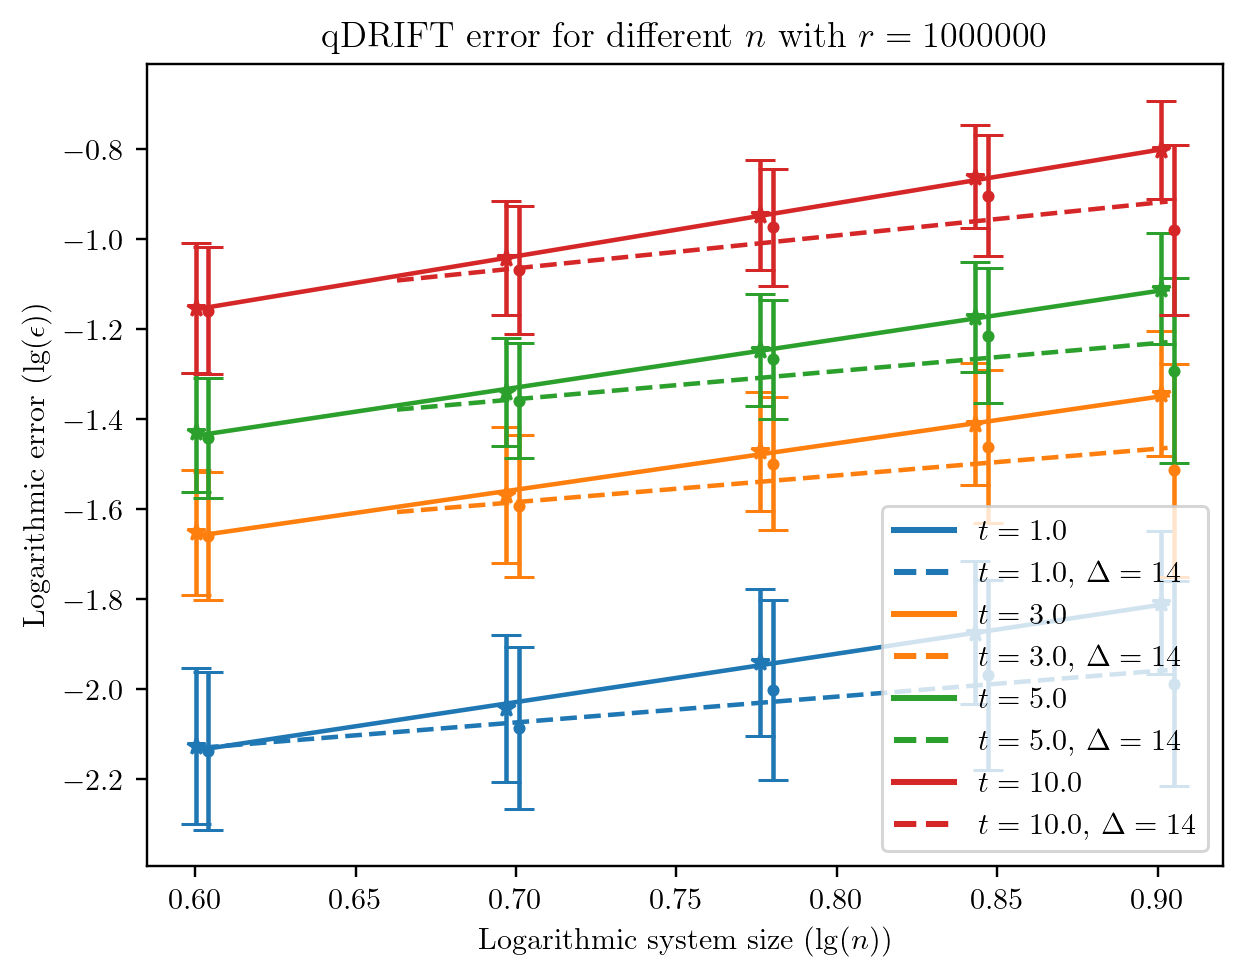

In [23]:
# qDRIFT error on Heisenberg model: n-dependence, fix r = 1000000
Delta = 14
index = 5  # 1000000
n_4 = "../qDRIFT/norm_1x4_14.mat"
n_5 = "../qDRIFT/norm_1x5_14.mat"
n_6 = "../qDRIFT/norm_1x6_14.mat"
n_7 = "../qDRIFT/norm_1x7_14.mat"
n_8 = "../qDRIFT/norm_1x8_14.mat"

def process_data(data_key):
    data_matrix = np.log(
        [
            (loadmat(n_4)[data_key])[:, index],
            (loadmat(n_5)[data_key])[:, index],
            (loadmat(n_6)[data_key])[:, index],
            (loadmat(n_7)[data_key])[:, index],
            (loadmat(n_8)[data_key])[:, index],
        ]
    ).T / np.log(10)
    mean_values = np.mean(data_matrix, axis=0)
    std_dev = np.std(data_matrix, axis=0)
    return mean_values, std_dev

t_1, t_1_std = process_data("t_1")
t_1_Delta, t_1_Delta_std = process_data("t_1_Delta")
t_3, t_3_std = process_data("t_3")
t_3_Delta, t_3_Delta_std = process_data("t_3_Delta")
t_5, t_5_std = process_data("t_5")
t_5_Delta, t_5_Delta_std = process_data("t_5_Delta")
t_10, t_10_std = process_data("t_10")
t_10_Delta, t_10_Delta_std = process_data("t_10_Delta")

n = np.array([4, 5, 6, 7, 8])

# Plot curve and error bar
fig, ax = plt.subplots(dpi=217)
ax.set_title("qDRIFT error for different $n$ with $r=1000000$")
ax.set_xlabel("Logarithmic system size ($\lg(n)$)")
ax.set_ylabel("Logarithmic error ($\lg(\epsilon)$)")

offset=0.002
plot_data_and_fit(n, t_1, t_1_std, "#1f77b4", "$t=1.0$", offset=-offset)
plot_data_and_fit(
    n,
    t_1_Delta,
    t_1_Delta_std,
    "#1f77b4",
    "$t=1.0$, $\Delta = {Delta}$".format(Delta=Delta),
    linestyle="--",
    marker=".",
    offset=offset
)
plot_data_and_fit(n, t_3, t_3_std, "#ff7f0e", "$t=3.0$", offset=-offset)
plot_data_and_fit(
    n,
    t_3_Delta,
    t_3_Delta_std,
    "#ff7f0e",
    "$t=3.0$, $\Delta = {Delta}$".format(Delta=Delta),
    linestyle="--",
    marker=".",
    offset=offset,
    starting_point=20
)
plot_data_and_fit(n, t_5, t_5_std, "#2ca02c", "$t=5.0$", offset=-offset)
plot_data_and_fit(
    n,
    t_5_Delta,
    t_5_Delta_std,
    "#2ca02c",
    "$t=5.0$, $\Delta = {Delta}$".format(Delta=Delta),
    linestyle="--",
    marker=".",
    offset=offset,
    starting_point=20
)
plot_data_and_fit(n, t_10, t_10_std, "#d62728", "$t=10.0$", offset=-offset)
plot_data_and_fit(
    n,
    t_10_Delta,
    t_10_Delta_std,
    "#d62728",
    "$t=10.0$, $\Delta = {Delta}$".format(Delta=Delta),
    linestyle="--",
    marker=".",
    offset=offset,
    starting_point=20
)

ax.legend(handler_map={plt.Line2D: ColorLineStyleHandler()})
fig.savefig("qDRIFT-n.pdf", dpi=600, format="pdf")

### Random Permutation

slope = -2.10458067719816 for $t=1.0$, $p=2$
slope = -2.0945768689610076 for $t=1.0$, $p=2$, $\Delta = 14$
slope = -2.1013594222284167 for $t=2.0$, $p=2$
slope = -2.095050347707041 for $t=2.0$, $p=2$, $\Delta = 14$
slope = -4.057061568459368 for $t=1.0$, $p=4$
slope = -4.126341383540624 for $t=1.0$, $p=4$, $\Delta = 14$
slope = -4.134356167352599 for $t=2.0$, $p=4$
slope = -4.201884218075952 for $t=2.0$, $p=4$, $\Delta = 14$


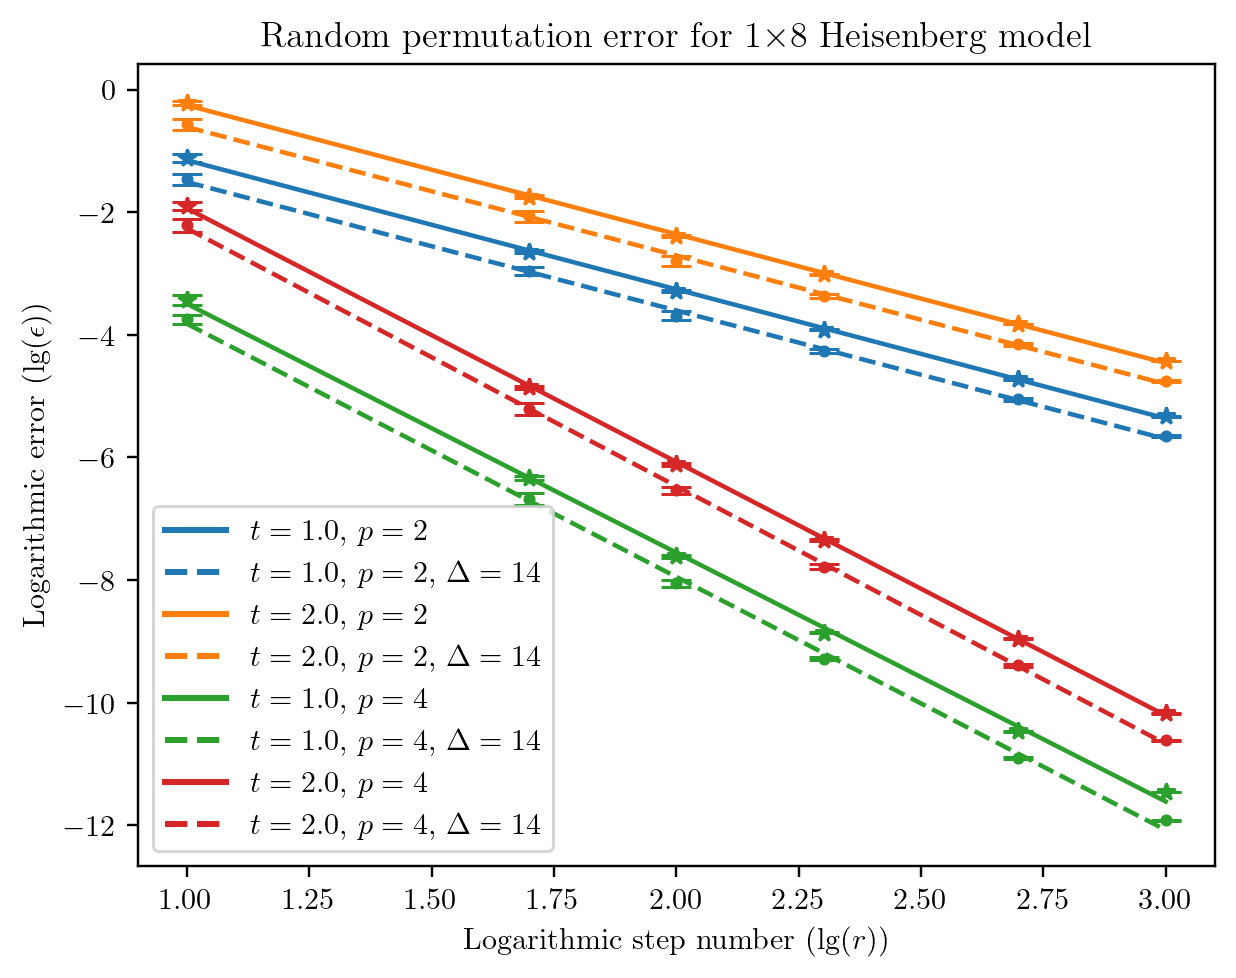

In [12]:
# Random permutation error on 1x8 Heisenberg model
# Load data and convert to logarithmic form
Delta = 14
File = "../Permutation/norm_1x8_14.mat"


def process_data(data_key):
    data_matrix = np.log(loadmat(File)[data_key]) / np.log(10)
    mean_values = np.mean(data_matrix, axis=0)
    std_dev = np.std(data_matrix, axis=0)
    return mean_values, std_dev


p_2_1, p_2_1_std = process_data("p_2_1")
p_2_1_Delta, p_2_1_Delta_std = process_data("p_2_1_Delta")
p_2_2, p_2_2_std = process_data("p_2_2")
p_2_2_Delta, p_2_2_Delta_std = process_data("p_2_2_Delta")
p_4_1, p_4_1_std = process_data("p_4_1")
p_4_1_Delta, p_4_1_Delta_std = process_data("p_4_1_Delta")
p_4_2, p_4_2_std = process_data("p_4_2")
p_4_2_Delta, p_4_2_Delta_std = process_data("p_4_2_Delta")

r = np.array([10, 50, 100, 200, 500, 1000])

# Plot curve and error bar
fig, ax = plt.subplots(dpi=217)
ax.set_title("Random permutation error for 1$\\times$8 Heisenberg model")
ax.set_xlabel("Logarithmic step number ($\lg(r)$)")
ax.set_ylabel("Logarithmic error ($\lg(\epsilon)$)")

offset=0
plot_data_and_fit(r, p_2_1, p_2_1_std, "#1f77b4", "$t=1.0$, $p=2$", offset=-offset)
plot_data_and_fit(
    r,
    p_2_1_Delta,
    p_2_1_Delta_std,
    "#1f77b4",
    "$t=1.0$, $p=2$, $\Delta = {Delta}$".format(Delta=Delta),
    linestyle="--",
    marker=".",
    offset=offset
)
plot_data_and_fit(r, p_2_2, p_2_2_std, "#ff7f0e", "$t=2.0$, $p=2$", offset=-offset)
plot_data_and_fit(
    r,
    p_2_2_Delta,
    p_2_2_Delta_std,
    "#ff7f0e",
    "$t=2.0$, $p=2$, $\Delta = {Delta}$".format(Delta=Delta),
    linestyle="--",
    marker=".",
    offset=offset
)
plot_data_and_fit(r, p_4_1, p_4_1_std, "#2ca02c", "$t=1.0$, $p=4$", offset=-offset)
plot_data_and_fit(
    r,
    p_4_1_Delta,
    p_4_1_Delta_std,
    "#2ca02c",
    "$t=1.0$, $p=4$, $\Delta = {Delta}$".format(Delta=Delta),
    linestyle="--",
    marker=".",
    offset=offset
)
plot_data_and_fit(r, p_4_2, p_4_2_std, "#d62728", "$t=2.0$, $p=4$", offset=-offset)
plot_data_and_fit(
    r,
    p_4_2_Delta,
    p_4_2_Delta_std,
    "#d62728",
    "$t=2.0$, $p=4$, $\Delta = {Delta}$".format(Delta=Delta),
    linestyle="--",
    marker=".",
    offset=offset
)

ax.legend(handler_map={plt.Line2D: ColorLineStyleHandler()})
fig.savefig("Permutation-1x8.pdf", dpi=600, format="pdf")

slope = 1.5543809245657774 for $t=1.0$, $p=2$
slope = 1.1410455901423266 for $t=1.0$, $p=2$, $\Delta = 14$
slope = 1.5460088493824 for $t=2.0$, $p=2$
slope = 1.138047049970426 for $t=2.0$, $p=2$, $\Delta = 14$
slope = 2.012330785143378 for $t=1.0$, $p=4$
slope = 1.1204788362238056 for $t=1.0$, $p=4$, $\Delta = 14$
slope = 1.6788187100991996 for $t=2.0$, $p=4$
slope = 1.1879666471697745 for $t=2.0$, $p=4$, $\Delta = 14$


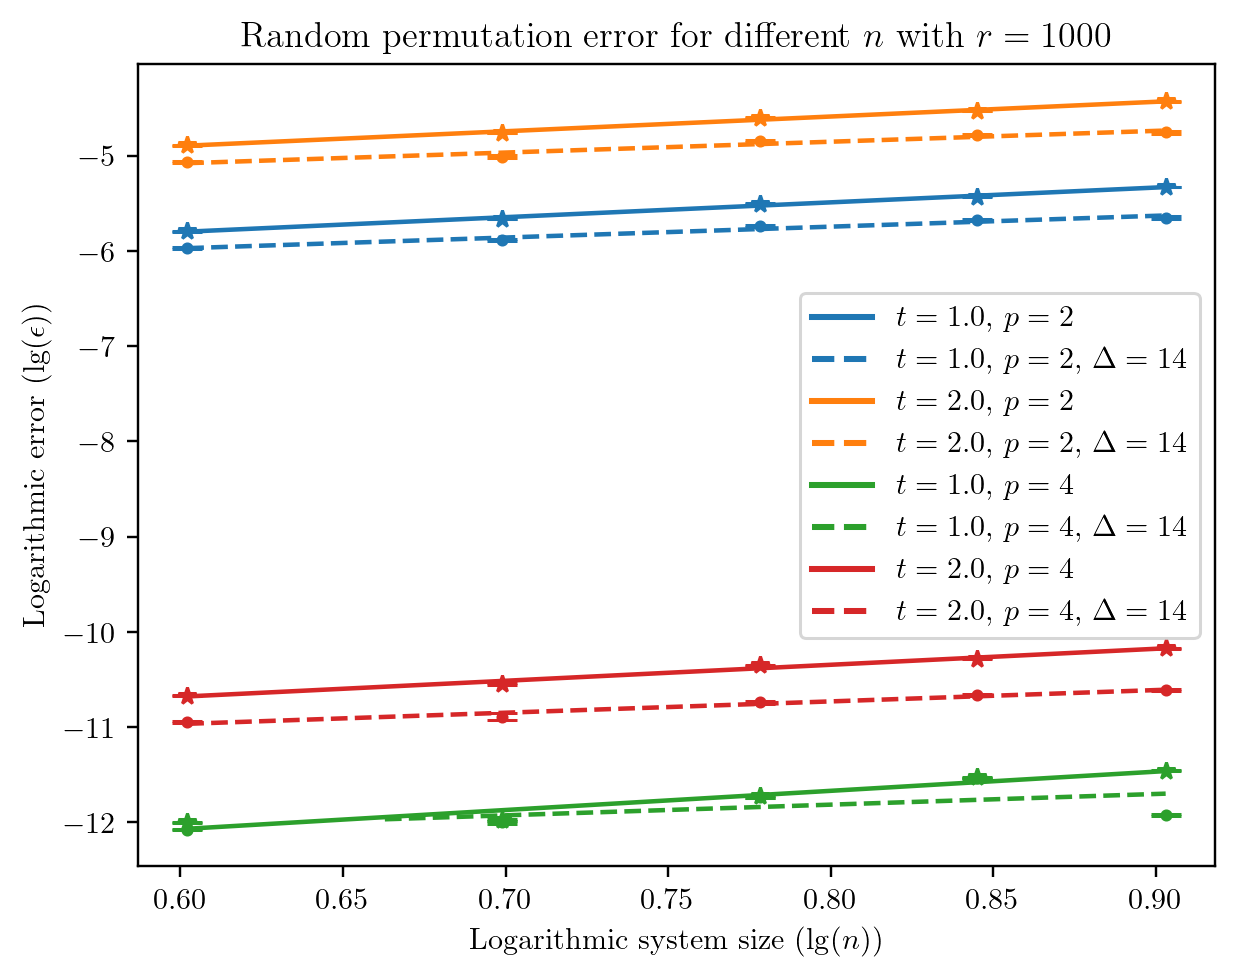

In [30]:
# Random Permutation Error on Heisenberg Model: n-dependence, fix r = 1000
Delta = 14
index = 5  # 1000
n_4 = "../Permutation/norm_1x4_14.mat"
n_5 = "../Permutation/norm_1x5_14.mat"
n_6 = "../Permutation/norm_1x6_14.mat"
n_7 = "../Permutation/norm_1x7_14.mat"
n_8 = "../Permutation/norm_1x8_14.mat"


def process_data(data_key):
    data_matrix = np.log(
        [
            (loadmat(n_4)[data_key])[:, index],
            (loadmat(n_5)[data_key])[:, index],
            (loadmat(n_6)[data_key])[:, index],
            (loadmat(n_7)[data_key])[:, index],
            (loadmat(n_8)[data_key])[:, index],
        ]
    ).T / np.log(10)
    mean_values = np.mean(data_matrix, axis=0)
    std_dev = np.std(data_matrix, axis=0)
    return mean_values, std_dev


p_2_1, p_2_1_std = process_data("p_2_1")
p_2_1_Delta, p_2_1_Delta_std = process_data("p_2_1_Delta")
p_2_2, p_2_2_std = process_data("p_2_2")
p_2_2_Delta, p_2_2_Delta_std = process_data("p_2_2_Delta")
p_4_1, p_4_1_std = process_data("p_4_1")
p_4_1_Delta, p_4_1_Delta_std = process_data("p_4_1_Delta")
p_4_2, p_4_2_std = process_data("p_4_2")
p_4_2_Delta, p_4_2_Delta_std = process_data("p_4_2_Delta")

n = np.array([4, 5, 6, 7, 8])

# Plot curve and error bar
fig, ax = plt.subplots(dpi=217)
ax.set_title("Random permutation error for different $n$ with $r=1000$")
ax.set_xlabel("Logarithmic system size ($\lg(n)$)")
ax.set_ylabel("Logarithmic error ($\lg(\epsilon)$)")

offset = 0
plot_data_and_fit(n, p_2_1, p_2_1_std, "#1f77b4", "$t=1.0$, $p=2$", offset=-offset)
plot_data_and_fit(
    n,
    p_2_1_Delta,
    p_2_1_Delta_std,
    "#1f77b4",
    "$t=1.0$, $p=2$, $\Delta = {Delta}$".format(Delta=Delta),
    linestyle="--",
    marker=".",
    offset=offset
)
plot_data_and_fit(n, p_2_2, p_2_2_std, "#ff7f0e", "$t=2.0$, $p=2$", offset=-offset)
plot_data_and_fit(
    n,
    p_2_2_Delta,
    p_2_2_Delta_std,
    "#ff7f0e",
    "$t=2.0$, $p=2$, $\Delta = {Delta}$".format(Delta=Delta),
    linestyle="--",
    marker=".",
    offset=offset
)
plot_data_and_fit(n, p_4_1, p_4_1_std, "#2ca02c", "$t=1.0$, $p=4$", offset=-offset)
plot_data_and_fit(
    n,
    p_4_1_Delta,
    p_4_1_Delta_std,
    "#2ca02c",
    "$t=1.0$, $p=4$, $\Delta = {Delta}$".format(Delta=Delta),
    linestyle="--",
    marker=".",
    starting_point=20,
    offset=offset
)
plot_data_and_fit(n, p_4_2, p_4_2_std, "#d62728", "$t=2.0$, $p=4$", offset=-offset)
plot_data_and_fit(
    n,
    p_4_2_Delta,
    p_4_2_Delta_std,
    "#d62728",
    "$t=2.0$, $p=4$, $\Delta = {Delta}$".format(Delta=Delta),
    linestyle="--",
    marker=".",
    offset=offset
)

ax.legend(handler_map={plt.Line2D: ColorLineStyleHandler()})
fig.savefig("Permutation-n.pdf", dpi=600, format="pdf")

### Symmetry Protection

-1.0039571091653379
-0.9987517430421747
slope = -1.510459611486233 for Random-ST
slope = -1.4987448935528571 for Random-ST, $\Delta = 14$
-2.0030844120425897
-2.000544325478135


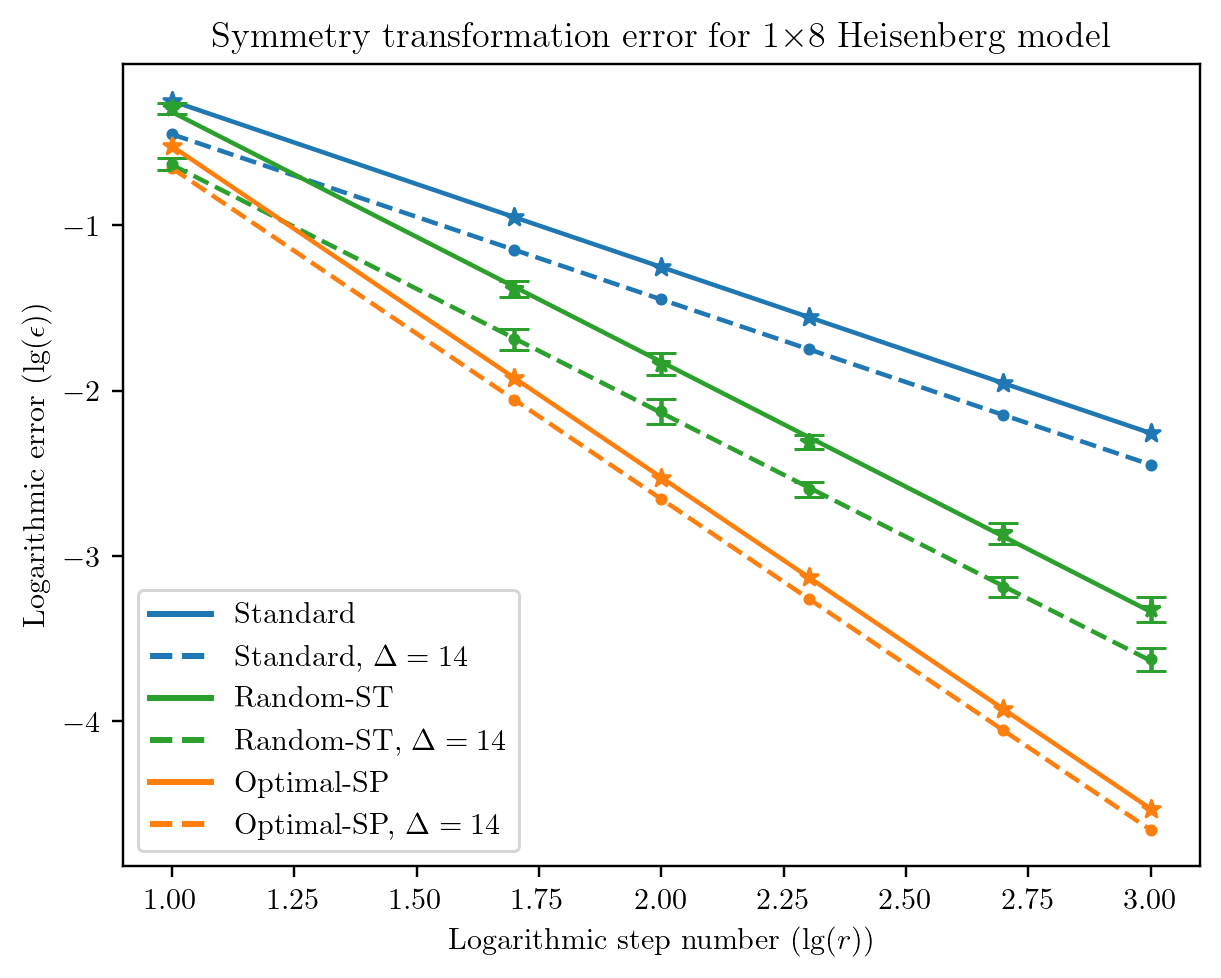

In [18]:
# Symmetry Transformation Error on 1x8 Heisenberg Model
File = "../Symmetry/norm_1x8_14.mat"
Delta = 14

Raw = np.log(loadmat(File)["Raw"].flatten()) / np.log(10)
Raw_Delta = np.log(loadmat(File)["Raw_Delta"].flatten()) / np.log(10)
SP = np.log(loadmat(File)["SP"].flatten()) / np.log(10)
SP_Delta = np.log(loadmat(File)["SP_Delta"].flatten()) / np.log(10)
Random = np.log(loadmat(File)["Random"].flatten()) / np.log(10)
Random_Delta = np.log(loadmat(File)["Random_Delta"].flatten()) / np.log(10)

step_number = np.log(np.array([10, 50, 100, 200, 500, 1000])) / np.log(10)
step_number_new = np.linspace(min(step_number), max(step_number), 100)

# Fit the curve and plot
fig, ax = plt.subplots(dpi=217)
ax.set_title("Symmetry transformation error for 1$\\times$8 Heisenberg model")
ax.set_xlabel("Logarithmic step number ($\lg(r)$)")
ax.set_ylabel("Logarithmic error ($\lg(\epsilon)$)")

coefficients_Raw = np.polyfit(step_number, Raw, 1)
poly_Raw = np.poly1d(coefficients_Raw)
coefficients_Raw_Delta = np.polyfit(step_number, Raw_Delta, 1)
poly_Raw_Delta = np.poly1d(coefficients_Raw_Delta)

coefficients_SP = np.polyfit(step_number, SP, 1)
poly_SP = np.poly1d(coefficients_SP)
coefficients_SP_Delta = np.polyfit(step_number, SP_Delta, 1)
poly_SP_Delta = np.poly1d(coefficients_SP_Delta)


def process_data(data_key):
    data_matrix = np.log(loadmat(File)[data_key]) / np.log(10)
    mean_values = np.mean(data_matrix, axis=0)
    std_dev = np.std(data_matrix, axis=0)
    return mean_values, std_dev


Random, Random_std = process_data("Random")
Random_Delta, Random_Delta_std = process_data("Random_Delta")

ax.scatter(step_number, Raw, marker="*", color="#1f77b4")
ax.plot(
    step_number_new,
    poly_Raw(step_number_new),
    color="#1f77b4",
    linestyle="-",
    label="Standard",
)
print(poly_Raw[1])

ax.scatter(step_number, Raw_Delta, marker=".", color="#1f77b4")
ax.plot(
    step_number_new,
    poly_Raw_Delta(step_number_new),
    color="#1f77b4",
    linestyle="--",
    label="Standard, $\Delta = {Delta}$".format(Delta=Delta),
)
print(poly_Raw_Delta[1])

offset = 0
plot_data_and_fit(
    [10, 50, 100, 200, 500, 1000],
    Random,
    Random_std,
    "#2ca02c",
    "Random-ST",
    offset=-offset,
)
plot_data_and_fit(
    [10, 50, 100, 200, 500, 1000],
    Random_Delta,
    Random_Delta_std,
    "#2ca02c",
    "Random-ST, $\Delta = {Delta}$".format(Delta=Delta),
    linestyle="--",
    marker=".",
    offset=offset,
)

ax.scatter(step_number, SP, marker="*", color="#ff7f0e")
ax.plot(
    step_number_new,
    poly_SP(step_number_new),
    color="#ff7f0e",
    linestyle="-",
    label="Optimal-SP",
)
print(poly_SP[1])

ax.scatter(step_number, SP_Delta, marker=".", color="#ff7f0e")
ax.plot(
    step_number_new,
    poly_SP_Delta(step_number_new),
    color="#ff7f0e",
    linestyle="--",
    label="Optimal-SP, $\Delta = {Delta}$".format(Delta=Delta),
)
print(poly_SP_Delta[1])

ax.legend(handler_map={plt.Line2D: ColorLineStyleHandler()})
fig.savefig("Symmetry-1x8.pdf", dpi=600, format="pdf")

0.954549966556956
0.4285176452916379
slope = 1.1464045137001186 for Random-ST
slope = 0.2833854868452503 for Random-ST, $\Delta = 14$
1.1077725188311849
0.7999078846023004


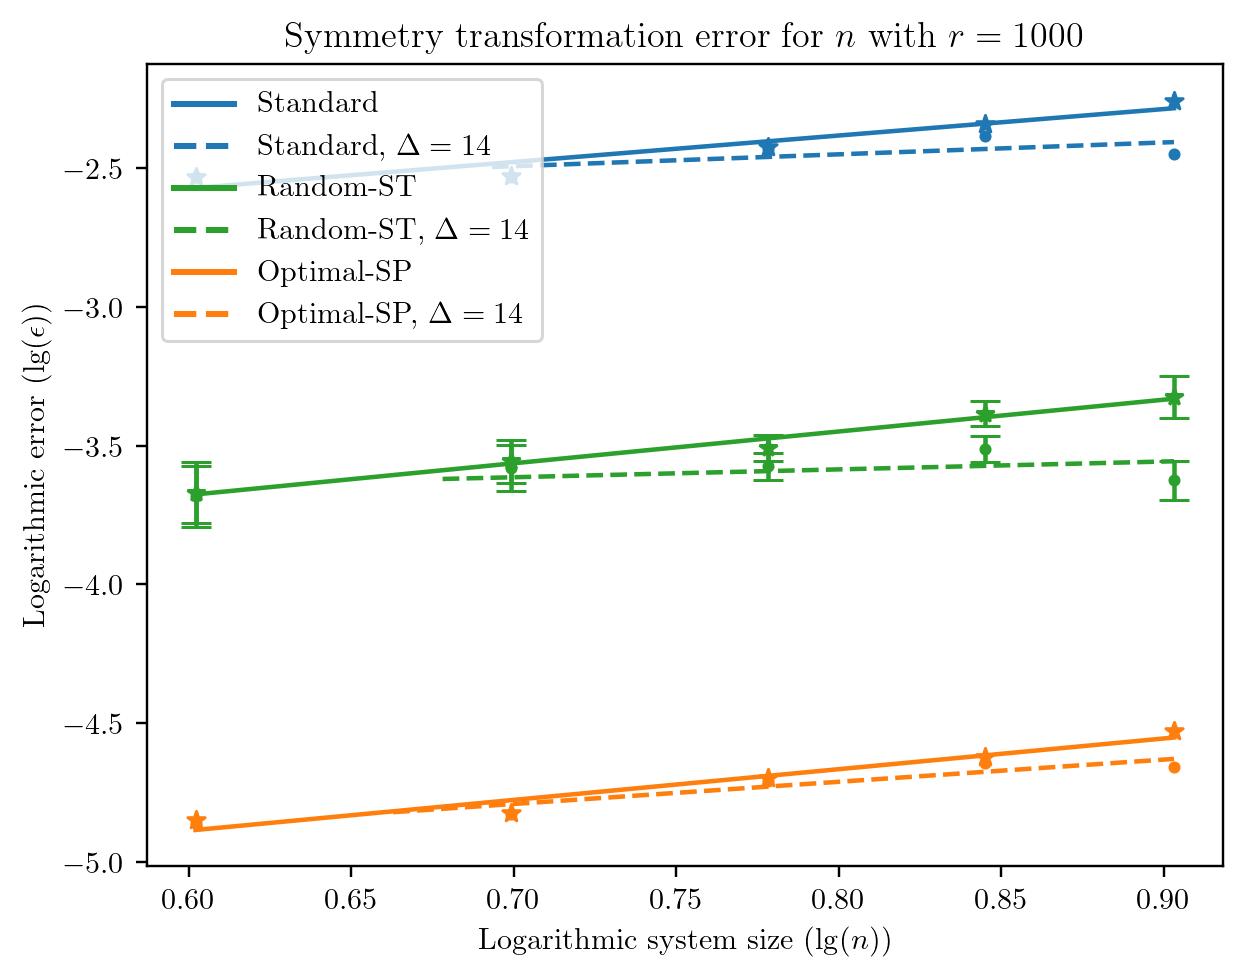

In [28]:
# Symmetry Transformation Error on Heisenberg Model: n-dependence, fix r = 1000
Delta = 14
index = 5  # 1000
n_4 = "../Symmetry/norm_1x4_14.mat"
n_5 = "../Symmetry/norm_1x5_14.mat"
n_6 = "../Symmetry/norm_1x6_14.mat"
n_7 = "../Symmetry/norm_1x7_14.mat"
n_8 = "../Symmetry/norm_1x8_14.mat"


def process_data(data_key):
    data_matrix = np.log(
        [
            (loadmat(n_4)[data_key])[:, index],
            (loadmat(n_5)[data_key])[:, index],
            (loadmat(n_6)[data_key])[:, index],
            (loadmat(n_7)[data_key])[:, index],
            (loadmat(n_8)[data_key])[:, index],
        ]
    ).T / np.log(10)
    mean_values = np.mean(data_matrix, axis=0)
    std_dev = np.std(data_matrix, axis=0)
    return mean_values, std_dev


Raw = np.array(
    [
        (loadmat(n_4)["Raw"].flatten())[index],
        (loadmat(n_5)["Raw"].flatten())[index],
        (loadmat(n_6)["Raw"].flatten())[index],
        (loadmat(n_7)["Raw"].flatten())[index],
        (loadmat(n_8)["Raw"].flatten())[index],
    ]
)
Raw_Delta = np.array(
    [
        (loadmat(n_4)["Raw_Delta"].flatten())[index],
        (loadmat(n_5)["Raw_Delta"].flatten())[index],
        (loadmat(n_6)["Raw_Delta"].flatten())[index],
        (loadmat(n_7)["Raw_Delta"].flatten())[index],
        (loadmat(n_8)["Raw_Delta"].flatten())[index],
    ]
)
SP = np.array(
    [
        (loadmat(n_4)["SP"].flatten())[index],
        (loadmat(n_5)["SP"].flatten())[index],
        (loadmat(n_6)["SP"].flatten())[index],
        (loadmat(n_7)["SP"].flatten())[index],
        (loadmat(n_8)["SP"].flatten())[index],
    ]
)
SP_Delta = np.array(
    [
        (loadmat(n_4)["SP_Delta"].flatten())[index],
        (loadmat(n_5)["SP_Delta"].flatten())[index],
        (loadmat(n_6)["SP_Delta"].flatten())[index],
        (loadmat(n_7)["SP_Delta"].flatten())[index],
        (loadmat(n_8)["SP_Delta"].flatten())[index],
    ]
)

Raw = np.log(Raw) / np.log(10)
Raw_Delta = np.log(Raw_Delta) / np.log(10)
SP = np.log(SP) / np.log(10)
SP_Delta = np.log(SP_Delta) / np.log(10)

Random, Random_std = process_data("Random")
Random_Delta, Random_Delta_std = process_data("Random_Delta")

step_number = np.array([4, 5, 6, 7, 8])
step_number = np.log(step_number) / np.log(10)
step_number_new = np.linspace(min(step_number), max(step_number), 100)

# Fit data and plot curve
fig, ax = plt.subplots(dpi=217)
ax.set_title("Symmetry transformation error for $n$ with $r=1000$")
ax.set_xlabel("Logarithmic system size ($\lg(n)$)")
ax.set_ylabel("Logarithmic error ($\lg(\epsilon)$)")

coefficients_Raw = np.polyfit(step_number, Raw, 1)
poly_Raw = np.poly1d(coefficients_Raw)
coefficients_Raw_Delta = np.polyfit(step_number, Raw_Delta, 1)
poly_Raw_Delta = np.poly1d(coefficients_Raw_Delta)

coefficients_SP = np.polyfit(step_number, SP, 1)
poly_SP = np.poly1d(coefficients_SP)
coefficients_SP_Delta = np.polyfit(step_number, SP_Delta, 1)
poly_SP_Delta = np.poly1d(coefficients_SP_Delta)

ax.scatter(step_number, Raw, marker="*", color="#1f77b4")
ax.plot(
    step_number_new,
    poly_Raw(step_number_new),
    color="#1f77b4",
    linestyle="-",
    label="Standard",
)
print(poly_Raw[1])

ax.scatter(step_number, Raw_Delta, marker=".", color="#1f77b4")
ax.plot(
    step_number_new[30:],
    poly_Raw_Delta(step_number_new)[30:],
    color="#1f77b4",
    linestyle="--",
    label="Standard, $\Delta = {Delta}$".format(Delta=Delta),
)
print(poly_Raw_Delta[1])

offset = 0
plot_data_and_fit(
    [4, 5, 6, 7, 8], Random, Random_std, "#2ca02c", "Random-ST", offset=-offset
)
plot_data_and_fit(
    [4, 5, 6, 7, 8],
    Random_Delta,
    Random_Delta_std,
    "#2ca02c",
    "Random-ST, $\Delta = {Delta}$".format(Delta=Delta),
    linestyle="--",
    marker=".",
    offset=offset,
    starting_point=25
)

ax.scatter(step_number, SP, marker="*", color="#ff7f0e")
ax.plot(
    step_number_new,
    poly_SP(step_number_new),
    color="#ff7f0e",
    linestyle="-",
    label="Optimal-SP",
)
print(poly_SP[1])

ax.scatter(step_number, SP_Delta, marker=".", color="#ff7f0e")
ax.plot(
    step_number_new[20:],
    poly_SP_Delta(step_number_new)[20:],
    color="#ff7f0e",
    linestyle="--",
    label="Optimal-SP, $\Delta = {Delta}$".format(Delta=Delta),
)
print(poly_SP_Delta[1])

ax.legend(handler_map={plt.Line2D: ColorLineStyleHandler()})
fig.savefig("Symmetry-n.pdf", dpi=600, format="pdf")

### Power Law

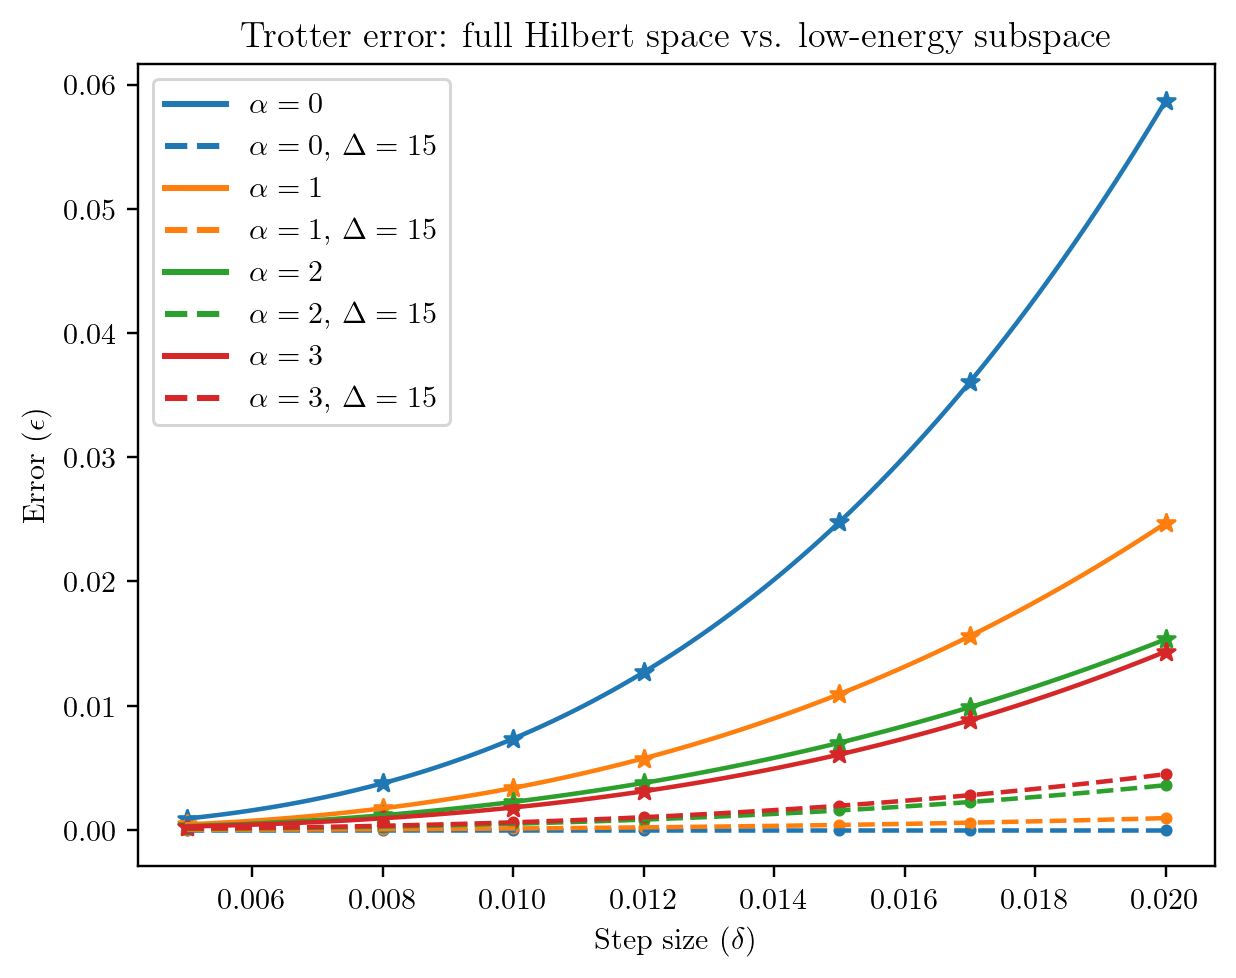

In [6]:
# Trotter Error on Power-Law Model: \alpha-dependence, fix r = 100
Delta = 15
File = "../Trotter/norm_3x3_0_15.mat"

alpha_0 = loadmat(File)["r_100"].flatten()
alpha_0_Delta = loadmat(File)["r_100_Delta"].flatten()

File = "../Trotter/norm_3x3_1_15.mat"
alpha_1 = loadmat(File)["r_100"].flatten()
alpha_1_Delta = loadmat(File)["r_100_Delta"].flatten()

File = "../Trotter/norm_3x3_2_15.mat"
alpha_2 = loadmat(File)["r_100"].flatten()
alpha_2_Delta = loadmat(File)["r_100_Delta"].flatten()

File = "../Trotter/norm_3x3_3_15.mat"
alpha_3 = loadmat(File)["r_100"].flatten()
alpha_3_Delta = loadmat(File)["r_100_Delta"].flatten()

dt = np.array([0.005, 0.008, 0.010, 0.012, 0.015, 0.017, 0.020])
dt_new = np.linspace(min(dt), max(dt), 100)

coefficients_alpha_0 = np.polyfit(dt, alpha_0, 3)
poly_alpha_0 = np.poly1d(coefficients_alpha_0)
coefficients_alpha_0_Delta = np.polyfit(dt, alpha_0_Delta, 3)
poly_alpha_0_Delta = np.poly1d(coefficients_alpha_0_Delta)

coefficients_alpha_1 = np.polyfit(dt, alpha_1, 3)
poly_alpha_1 = np.poly1d(coefficients_alpha_1)
coefficients_alpha_1_Delta = np.polyfit(dt, alpha_1_Delta, 3)
poly_alpha_1_Delta = np.poly1d(coefficients_alpha_1_Delta)

coefficients_alpha_2 = np.polyfit(dt, alpha_2, 3)
poly_alpha_2 = np.poly1d(coefficients_alpha_2)
coefficients_alpha_2_Delta = np.polyfit(dt, alpha_2_Delta, 3)
poly_alpha_2_Delta = np.poly1d(coefficients_alpha_2_Delta)

coefficients_alpha_3 = np.polyfit(dt, alpha_3, 3)
poly_alpha_3 = np.poly1d(coefficients_alpha_3)
coefficients_alpha_3_Delta = np.polyfit(dt, alpha_3_Delta, 3)
poly_alpha_3_Delta = np.poly1d(coefficients_alpha_3_Delta)

fig, ax = plt.subplots(dpi=217)
ax.set_title("Trotter error: full Hilbert space vs. low-energy subspace")
ax.set_xlabel("Step size ($\delta$)")
ax.set_ylabel("Error ($\epsilon$)")

ax.scatter(dt, alpha_0, marker="*", color="#1f77b4")
ax.plot(
    dt_new, poly_alpha_0(dt_new), color="#1f77b4", linestyle="-", label="$\\alpha=0$"
)

ax.scatter(dt, alpha_0_Delta, marker=".", color="#1f77b4")
ax.plot(
    dt_new,
    poly_alpha_0_Delta(dt_new),
    color="#1f77b4",
    linestyle="--",
    label="$\\alpha=0$, $\Delta = {Delta}$".format(Delta=Delta),
)

ax.scatter(dt, alpha_1, marker="*", color="#ff7f0e")
ax.plot(
    dt_new, poly_alpha_1(dt_new), color="#ff7f0e", linestyle="-", label="$\\alpha=1$"
)

ax.scatter(dt, alpha_1_Delta, marker=".", color="#ff7f0e")
ax.plot(
    dt_new,
    poly_alpha_1_Delta(dt_new),
    color="#ff7f0e",
    linestyle="--",
    label="$\\alpha=1$, $\Delta = {Delta}$".format(Delta=Delta),
)

ax.scatter(dt, alpha_2, marker="*", color="#2ca02c")
ax.plot(
    dt_new, poly_alpha_2(dt_new), color="#2ca02c", linestyle="-", label="$\\alpha=2$"
)

ax.scatter(dt, alpha_2_Delta, marker=".", color="#2ca02c")
ax.plot(
    dt_new,
    poly_alpha_2_Delta(dt_new),
    color="#2ca02c",
    linestyle="--",
    label="$\\alpha=2$, $\Delta = {Delta}$".format(Delta=Delta),
)

ax.scatter(dt, alpha_3, marker="*", color="#d62728")
ax.plot(
    dt_new, poly_alpha_3(dt_new), color="#d62728", linestyle="-", label="$\\alpha=3$"
)

ax.scatter(dt, alpha_3_Delta, marker=".", color="#d62728")
ax.plot(
    dt_new,
    poly_alpha_3_Delta(dt_new),
    color="#d62728",
    linestyle="--",
    label="$\\alpha=3$, $\Delta = {Delta}$".format(Delta=Delta),
)

ax.legend(handler_map={plt.Line2D: ColorLineStyleHandler()})

fig.savefig("Power-Law.pdf", dpi=600, format="pdf")

### Legend

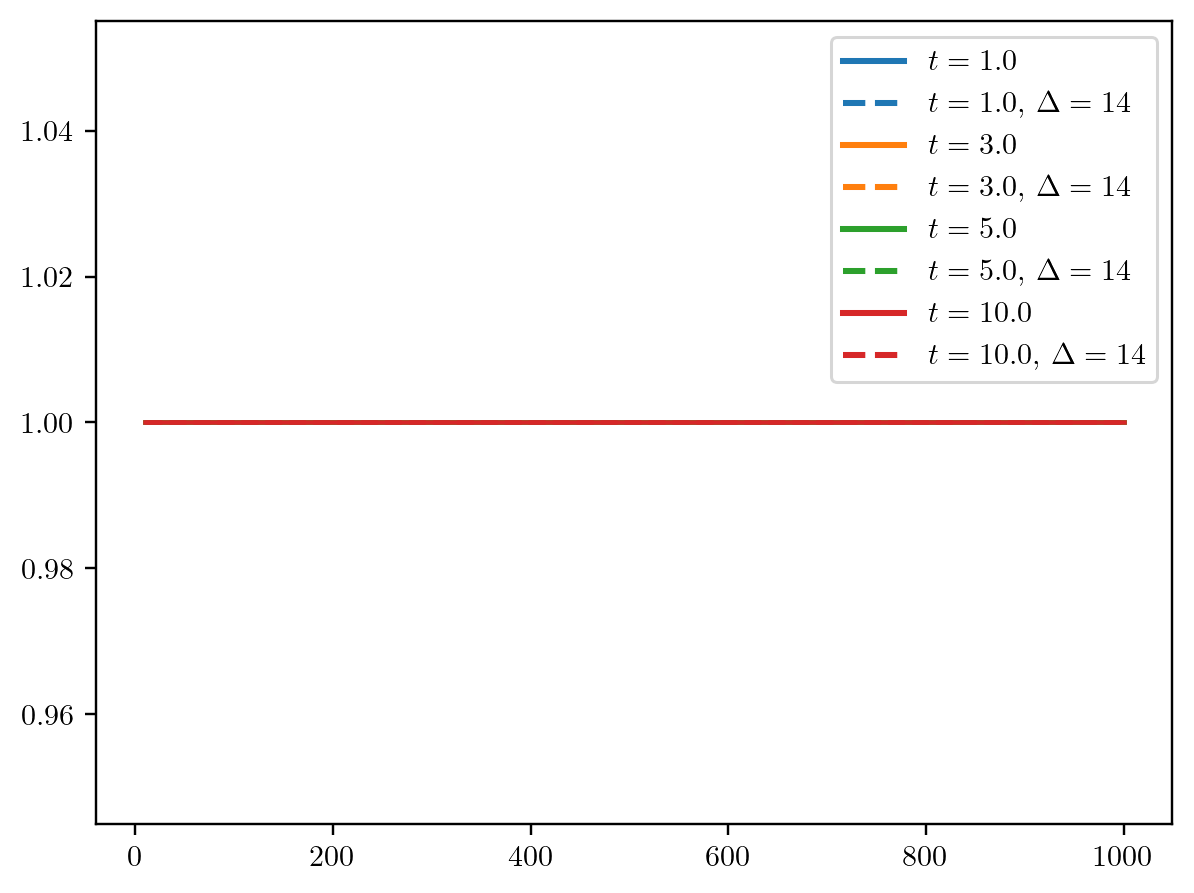

In [11]:
# Generate legend
Delta = 14
y = np.array([1, 1, 1, 1, 1, 1])
x = np.array([10, 50, 100, 200, 500, 1000])
fig, ax = plt.subplots(dpi=217)

# qDRIFT
ax.plot(x, y, color="#1f77b4", label="$t=1.0$")
ax.plot(
    x,
    y,
    color="#1f77b4",
    linestyle="--",
    label="$t=1.0$, $\Delta = {Delta}$".format(Delta=Delta),
)
ax.plot(x, y, color="#ff7f0e", label="$t=3.0$")
ax.plot(
    x,
    y,
    color="#ff7f0e",
    linestyle="--",
    label="$t=3.0$, $\Delta = {Delta}$".format(Delta=Delta),
)
ax.plot(x, y, color="#2ca02c", label="$t=5.0$")
ax.plot(
    x,
    y,
    color="#2ca02c",
    linestyle="--",
    label="$t=5.0$, $\Delta = {Delta}$".format(Delta=Delta),
)
ax.plot(x, y, color="#d62728", label="$t=10.0$")
ax.plot(
    x,
    y,
    color="#d62728",
    linestyle="--",
    label="$t=10.0$, $\Delta = {Delta}$".format(Delta=Delta),
)
legend = ax.legend(handler_map={plt.Line2D: ColorLineStyleHandler()})
legend_fig = legend.figure
legend_fig.canvas.draw()
bbox = legend.get_window_extent().transformed(legend_fig.dpi_scale_trans.inverted())
legend_fig.savefig("qDRIFT-legend.pdf", bbox_inches=bbox)

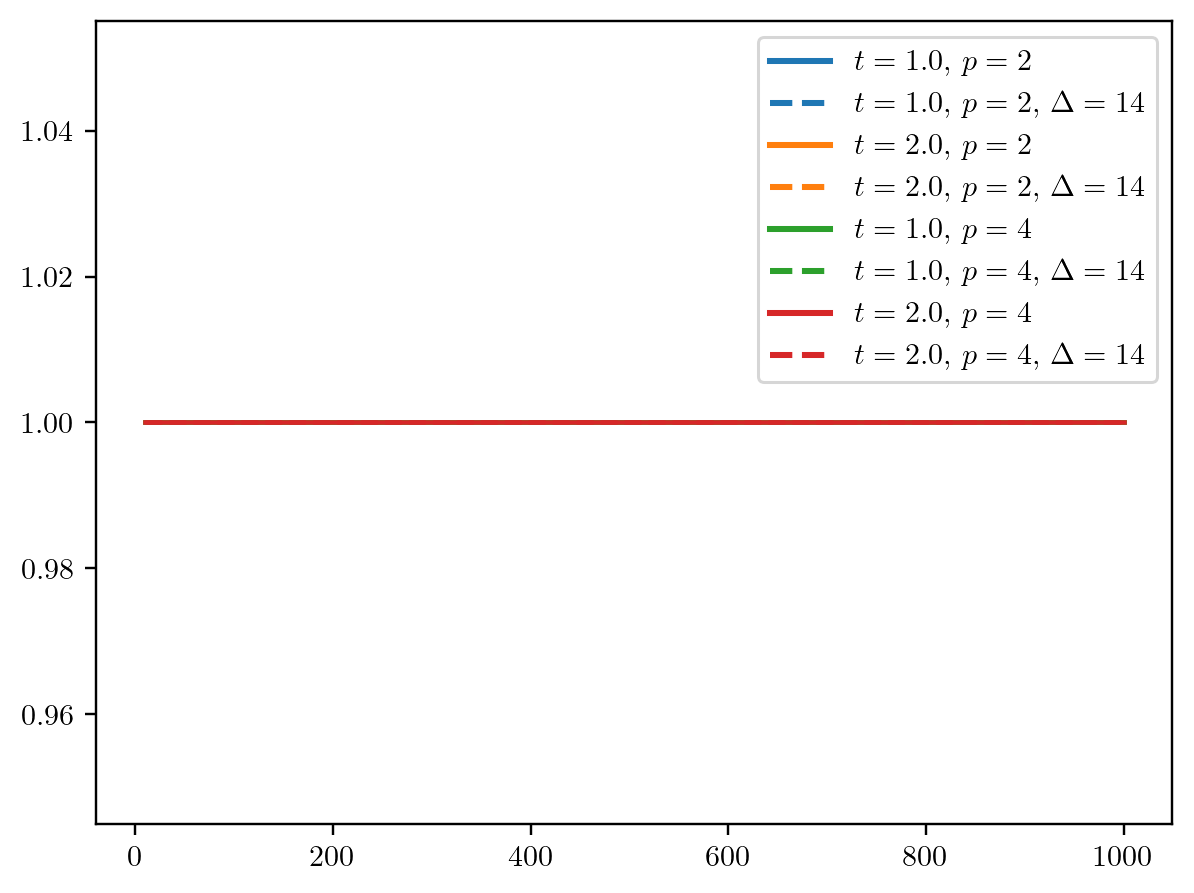

In [22]:
# Generate legend
Delta = 14
y = np.array([1, 1, 1, 1, 1, 1])
x = np.array([10, 50, 100, 200, 500, 1000])
fig, ax = plt.subplots(dpi=217)

# Random Permutation
ax.plot(x, y, color="#1f77b4", label="$t=1.0$, $p=2$")
ax.plot(x, y, color="#1f77b4", linestyle = "--", label="$t=1.0$, $p=2$, $\Delta = {Delta}$".format(Delta=Delta))
ax.plot(x, y, color="#ff7f0e", label="$t=2.0$, $p=2$")
ax.plot(x, y, color="#ff7f0e", linestyle = "--", label="$t=2.0$, $p=2$, $\Delta = {Delta}$".format(Delta=Delta))
ax.plot(x, y, color="#2ca02c", label="$t=1.0$, $p=4$")
ax.plot(x, y, color="#2ca02c", linestyle = "--", label="$t=1.0$, $p=4$, $\Delta = {Delta}$".format(Delta=Delta))
ax.plot(x, y, color="#d62728", label="$t=2.0$, $p=4$")
ax.plot(x, y, color="#d62728", linestyle = "--", label="$t=2.0$, $p=4$, $\Delta = {Delta}$".format(Delta=Delta))

legend = ax.legend(handler_map={plt.Line2D: ColorLineStyleHandler()})
legend_fig = legend.figure
legend_fig.canvas.draw()
bbox = legend.get_window_extent().transformed(legend_fig.dpi_scale_trans.inverted())
legend_fig.savefig("Permutation-legend.pdf", bbox_inches=bbox)

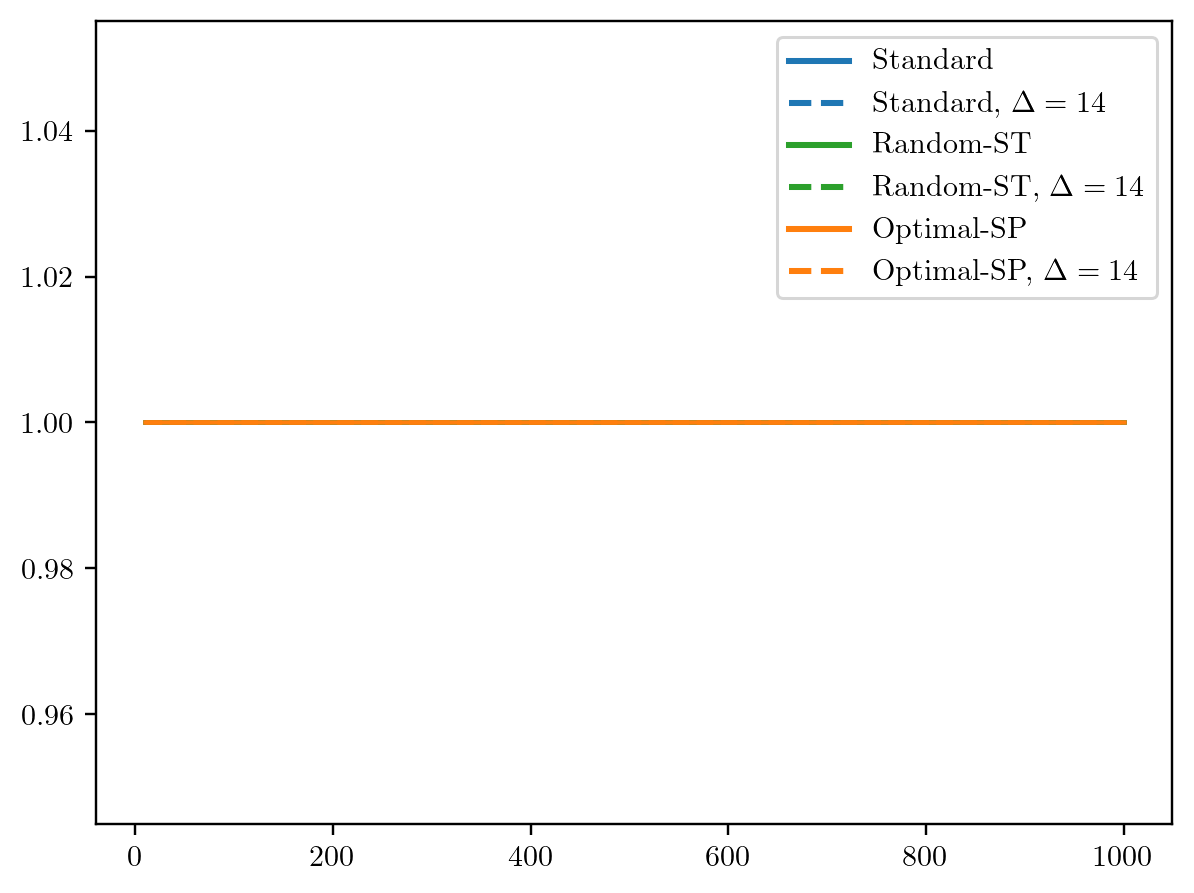

In [13]:
# Generate legend
Delta = 14
y = np.array([1, 1, 1, 1, 1, 1])
x = np.array([10, 50, 100, 200, 500, 1000])
fig, ax = plt.subplots(dpi=217)

# qDRIFT
ax.plot(x, y, color="#1f77b4", label="Standard")
ax.plot(
    x,
    y,
    color="#1f77b4",
    linestyle="--",
    label="Standard, $\Delta = {Delta}$".format(Delta=Delta),
)

ax.plot(x, y, color="#2ca02c", label="Random-ST")
ax.plot(
    x,
    y,
    color="#2ca02c",
    linestyle="--",
    label="Random-ST, $\Delta = {Delta}$".format(Delta=Delta),
)

ax.plot(x, y, color="#ff7f0e", label="Optimal-SP")
ax.plot(
    x,
    y,
    color="#ff7f0e",
    linestyle="--",
    label="Optimal-SP, $\Delta = {Delta}$".format(Delta=Delta),
)

legend = ax.legend(handler_map={plt.Line2D: ColorLineStyleHandler()})
legend_fig = legend.figure
legend_fig.canvas.draw()
bbox = legend.get_window_extent().transformed(legend_fig.dpi_scale_trans.inverted())
legend_fig.savefig("Symmetry-legend.pdf", bbox_inches=bbox)